In [1]:
from ANEMO import ANEMO
from ANEMO import read_edf
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = 'data/enregistrement_BMC_2017-09-26_095637.asc'
data = read_edf(datafile, 'TRIALID')

expfile = 'data/enregistrement_BMC_2017-09-26_095637.pkl'
with open(expfile, 'rb') as fichier :
    exp = pickle.load(fichier, encoding='latin1')

In [3]:
A = ANEMO(exp)
Fit = ANEMO.Fit(exp)

In [4]:
N_trial = 200 # nb_trial par block
trial=8
block=0

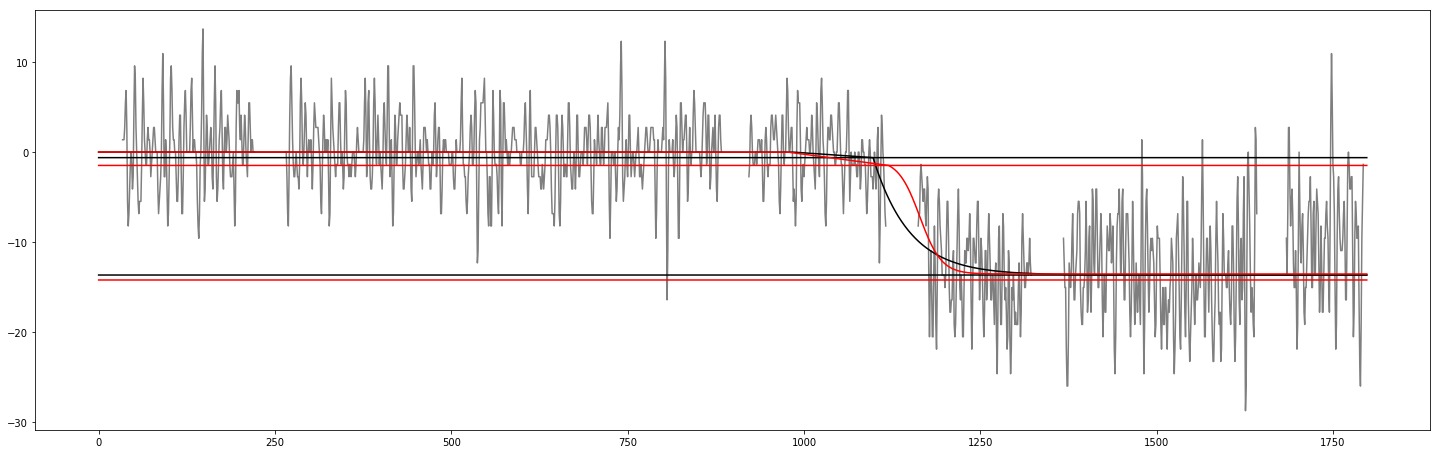

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(25, (25*1/2)/1.6180))

data_trial = data[trial+block*N_trial]
arg = A.arg(data_trial, trial=trial, block=block)

velocity_NAN = A.velocity_NAN(**arg)
ax.plot(velocity_NAN, c='k', alpha=0.5)


old_latency, old_steady_state, old_a_anti = ANEMO.classical_method.Full(velocity_NAN, arg.TargetOn-arg.t_0)

c = ['k', 'r']

for i, equation in enumerate(['fct_velocity', 'fct_velocity_sigmo']) :
    result_fit = Fit.Fit_trial(velocity_NAN, equation=equation, value_latency=old_latency,
                                   value_maxi=old_steady_state, value_anti=old_a_anti, **arg)


    if equation=='fct_velocity' :
        fct = ANEMO.Equation.fct_velocity
        ramp = result_fit.values['tau']
    elif equation=='fct_velocity_sigmo' :
        fct = ANEMO.Equation.fct_velocity_sigmo
        ramp = result_fit.values['ramp_pursuit']
    
    
    fit = fct(np.arange(len(velocity_NAN)), arg.dir_target,
              result_fit.values['start_anti'], result_fit.values['a_anti'],
              result_fit.values['latency'], ramp,
              result_fit.values['steady_state'], do_whitening=False)


    ax.plot(fit, c=c[i])

    steady_state = result_fit.values['steady_state'] *arg.dir_target
    y_fit_debut_poursuite = fit[int(result_fit.values['latency'])]

    ax.plot(np.ones(len(velocity_NAN))*steady_state, c=c[i])
    ax.plot(np.ones(len(velocity_NAN))*y_fit_debut_poursuite, c=c[i])